In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyRegressor

df = pd.read_csv('/Users/reehaalthaf/Downloads/archive/spotify_dataset.csv')

In [2]:
df.shape

(551443, 39)

In [3]:
df.head()

,Artist(s),song,text,Length,emotion,Genre,Album,Release Date,Key,Tempo,...,Good for Morning Routine,Similar Artist 1,Similar Song 1,Similarity Score 1,Similar Artist 2,Similar Song 2,Similarity Score 2,Similar Artist 3,Similar Song 3,Similarity Score 3
0,!!!,Even When the Waters Cold,Friends told her she was better off at the bot...,03:47,sadness,hip hop,Thr!!!er,29th April 2013,D min,105,...,0,Corey Smith,If I Could Do It Again,0.986061,Toby Keith,Drinks After Work,0.983719,Space,Neighbourhood,0.983236
1,!!!,One Girl / One Boy,"Well I heard it, playing soft From a drunken b...",04:03,sadness,hip hop,Thr!!!er,29th April 2013,A# min,117,...,0,Hiroyuki Sawano,BRE@TH//LESS,0.995409,When In Rome,Heaven Knows,0.990905,Justice Crew,Everybody,0.984483
2,!!!,Pardon My Freedom,"Oh my god, did I just say that out loud? Shoul...",05:51,joy,hip hop,Louden Up Now,8th June 2004,A Maj,121,...,0,Ricky Dillard,More Abundantly Medley Live,0.993176,Juliet,Avalon,0.965147,The Jacksons,Lovely One,0.956752
3,!!!,Ooo,[Verse 1] Remember when I called you on the te...,03:44,joy,hip hop,As If,16th October 2015,A min,122,...,0,Eric Clapton,Man Overboard,0.992749,Roxette,Don't Believe In Accidents,0.991494,Tiwa Savage,My Darlin,0.990381
4,!!!,Freedom 15,[Verse 1] Calling me like I got something to s...,06:00,joy,hip hop,As If,16th October 2015,F min,123,...,0,Cibo Matto,Lint Of Love,0.981610,Barrington Levy,Better Than Gold,0.981524,Freestyle,Its Automatic,0.981415


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551443 entries, 0 to 551442
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Artist(s)                       551443 non-null  object 
 1   song                            551427 non-null  object 
 2   text                            551443 non-null  object 
 3   Length                          551443 non-null  object 
 4   emotion                         551443 non-null  object 
 5   Genre                           551443 non-null  object 
 6   Album                           551391 non-null  object 
 7   Release Date                    551443 non-null  object 
 8   Key                             551443 non-null  object 
 9   Tempo                           551443 non-null  int64  
 10  Loudness (db)                   551443 non-null  object 
 11  Time signature                  551435 non-null  object 
 12  Explicit        

In [5]:
# since the length of the song is an object as it is in mm:ss format we convert it so that it is an integer that contains seconds of the song
df['Length_sec'] = df['Length'].apply(lambda x: int(x.split(':')[0])*60 + int(x.split(':')[1]))

In [6]:
# Encoded the column emotion and it is an object (Need to check if this is required and gt back to this)
#df['emotion_encoded'] = LabelEncoder().fit_transform(df['emotion'])

df['emotion_encoded'] = LabelEncoder().fit_transform(df['emotion'])


In [7]:
# Encoded the column genre and it is an object (Need to check if this is required and gt back to this)
# Label Embedding wasn't the best approach, I've implemented one hot embedding ahead.
# df['Genre_encoded'] = LabelEncoder().fit_transform(df['Genre'])

In [8]:
# The column Loudness (db) although stores numbers saves it as an object due to the presence of db after the number, hence we remove the trailing db.
df['Loudness_encoded'] = (
    df['Loudness (db)']
    .str.replace('db', '', regex=False)  # remove 'db'
    .str.strip()                          # remove spaces
)

df['Loudness_encoded'] = pd.to_numeric(df['Loudness_encoded'], errors='coerce')


In [9]:
# Same as columns emotion and genre
df['Key_encoded'] = LabelEncoder().fit_transform(df['Key'])

In [10]:
# Checking updated dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551443 entries, 0 to 551442
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Artist(s)                       551443 non-null  object 
 1   song                            551427 non-null  object 
 2   text                            551443 non-null  object 
 3   Length                          551443 non-null  object 
 4   emotion                         551443 non-null  object 
 5   Genre                           551443 non-null  object 
 6   Album                           551391 non-null  object 
 7   Release Date                    551443 non-null  object 
 8   Key                             551443 non-null  object 
 9   Tempo                           551443 non-null  int64  
 10  Loudness (db)                   551443 non-null  object 
 11  Time signature                  551435 non-null  object 
 12  Explicit        

In [11]:
df.describe()

,Tempo,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness,Good for Party,...,Good for Driving,Good for Social Gatherings,Good for Morning Routine,Similarity Score 1,Similarity Score 2,Similarity Score 3,Length_sec,emotion_encoded,Loudness_encoded,Key_encoded
count,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,...,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000
mean,120.513567,32.258106,62.661874,59.195460,47.738330,11.663980,19.655658,25.748436,7.152255,0.061809,...,0.057797,0.012253,0.066215,0.984107,0.979013,0.975938,223.613837,6.925394,-8.075336,10.972108
std,29.185533,18.033931,22.399159,17.511007,24.159671,12.342389,16.274817,29.343731,20.589200,0.240808,...,0.233360,0.110014,0.248658,0.013559,0.015438,0.016512,87.330824,2.859572,4.086634,6.941816
min,31.000000,0.000000,0.000000,6.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.002656,0.002647,0.002647,5.000000,0.000000,-50.060000,0.000000
25%,97.000000,20.000000,48.000000,47.000000,28.000000,4.000000,10.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.977433,0.971582,0.967926,178.000000,7.000000,-9.850000,6.000000
50%,120.000000,30.000000,65.000000,60.000000,47.000000,6.000000,13.000000,12.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.985926,0.980971,0.978078,214.000000,7.000000,-7.190000,10.000000
75%,140.000000,43.000000,80.000000,72.000000,66.000000,15.000000,25.000000,43.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.993567,0.988592,0.986079,254.000000,10.000000,-5.370000,17.000000
max,200.000000,100.000000,100.000000,99.000000,100.000000,97.000000,100.000000,100.000000,100.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3572.000000,12.000000,4.980000,23.000000


In [12]:
# Since we want to predict the popularity of the song, our target variable will be the popularity column.
radio_hit = df['Popularity'].unique()
radio_hit.sort()
radio_hit

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  97,  98,  99, 100])

In [13]:
print(df.groupby('emotion').size())

emotion
Love              3
True             17
anger        109678
angry             1
confusion         1
fear          28097
interest          1
joy          209009
love          27963
pink              2
sadness      171078
surprise       5592
thirst            1
dtype: int64


In [14]:
# Distribution of Popularity
print(df.groupby('Popularity').size())

Popularity
0      9169
1      3679
2      3426
3      3530
4      3775
       ... 
95        8
97       17
98        3
99       11
100       1
Length: 100, dtype: int64


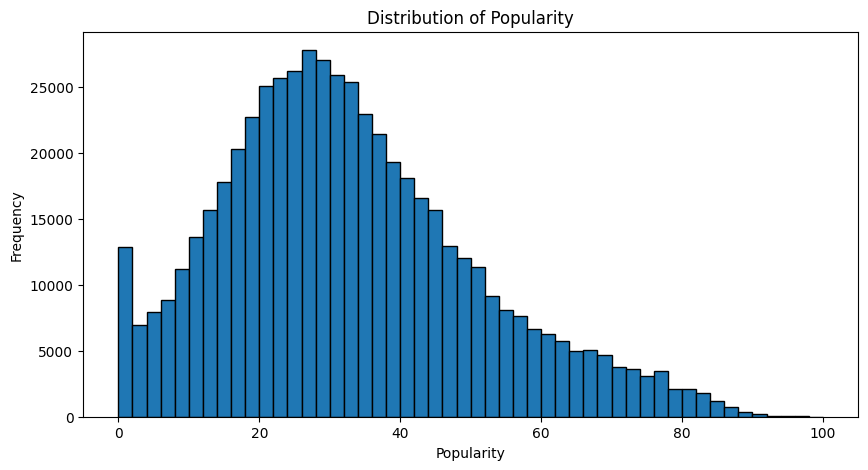

In [15]:
# plotting the distribution of popularity. It is positively skewed.
plt.figure(figsize=(10, 5))
plt.hist(df['Popularity'], bins=50, edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity')
plt.show()

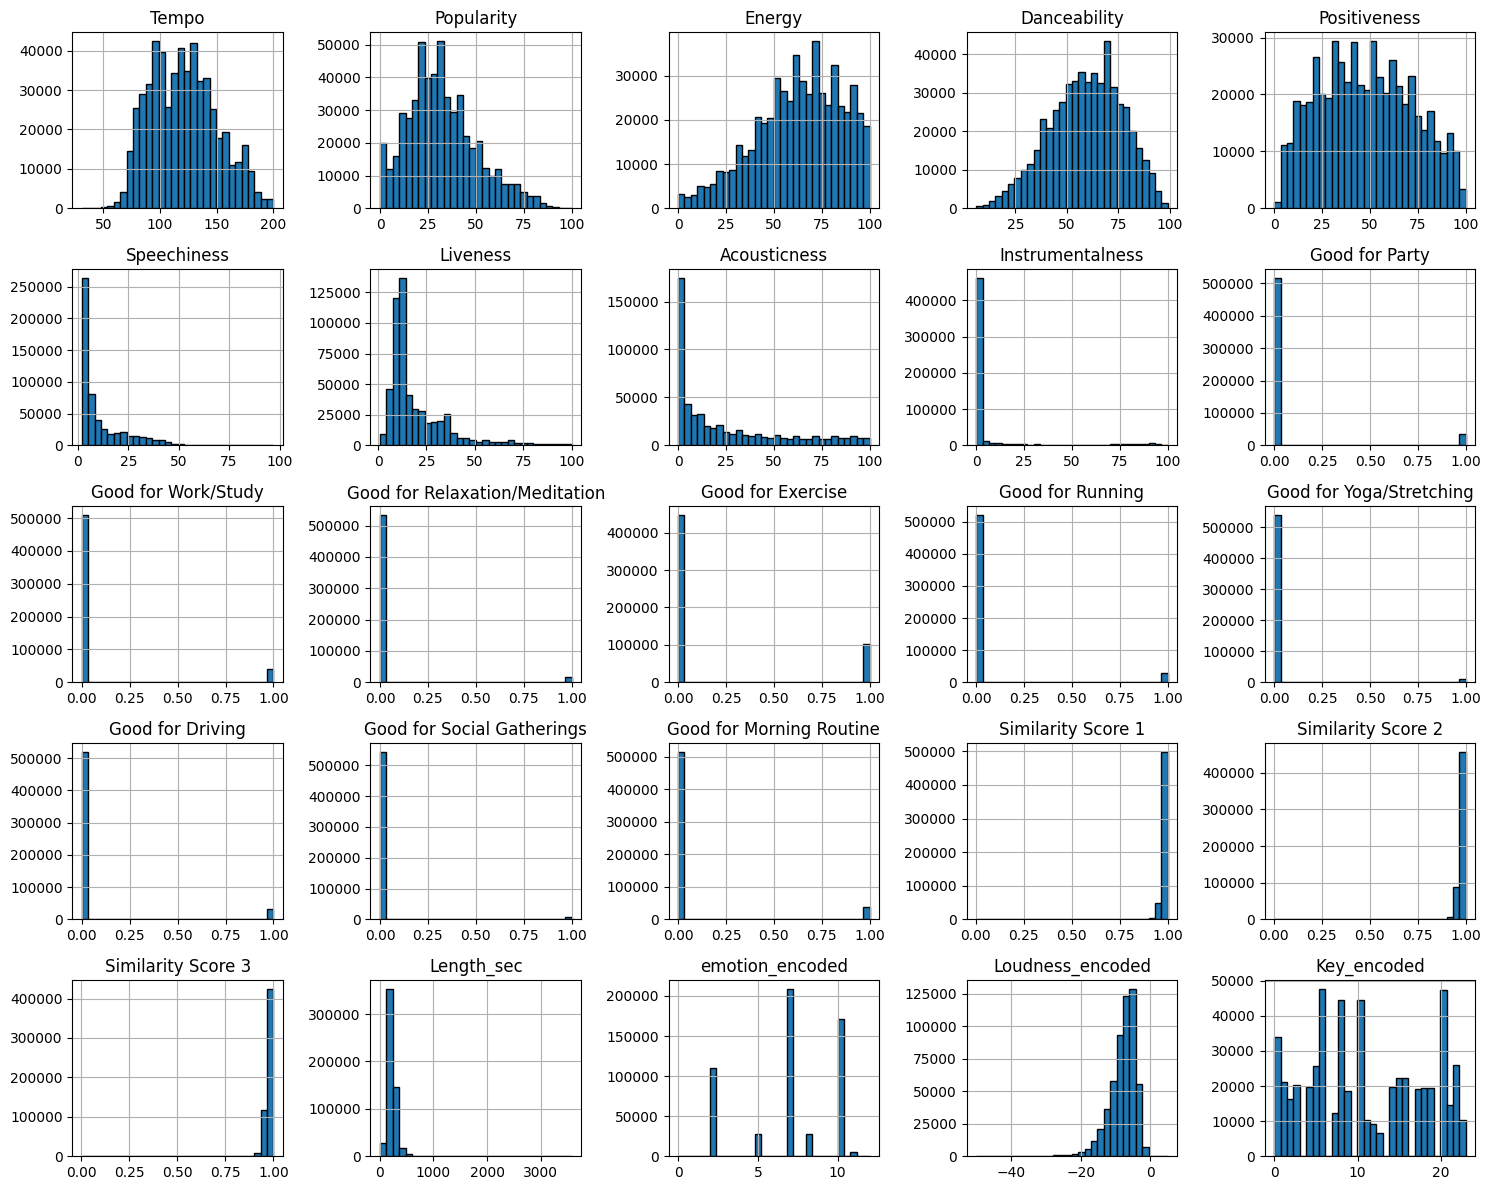

In [16]:
# All numerical features at once. Need to see how we can improve this and if we need all features
df.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


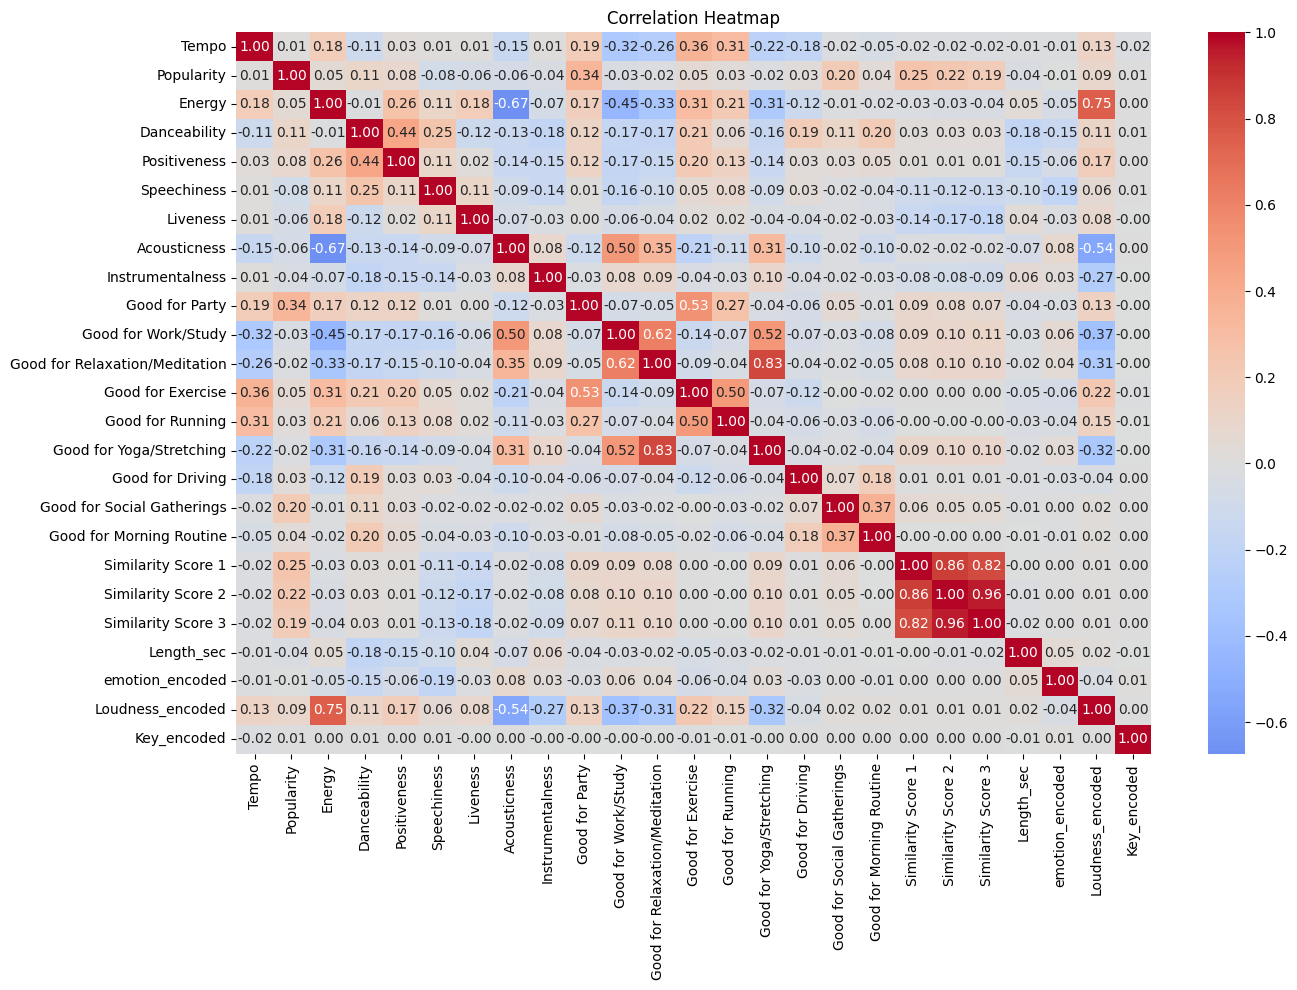

In [17]:
# All numerical features at once. Need to see how we can improve this and if we need all features.
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(14, 10))
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

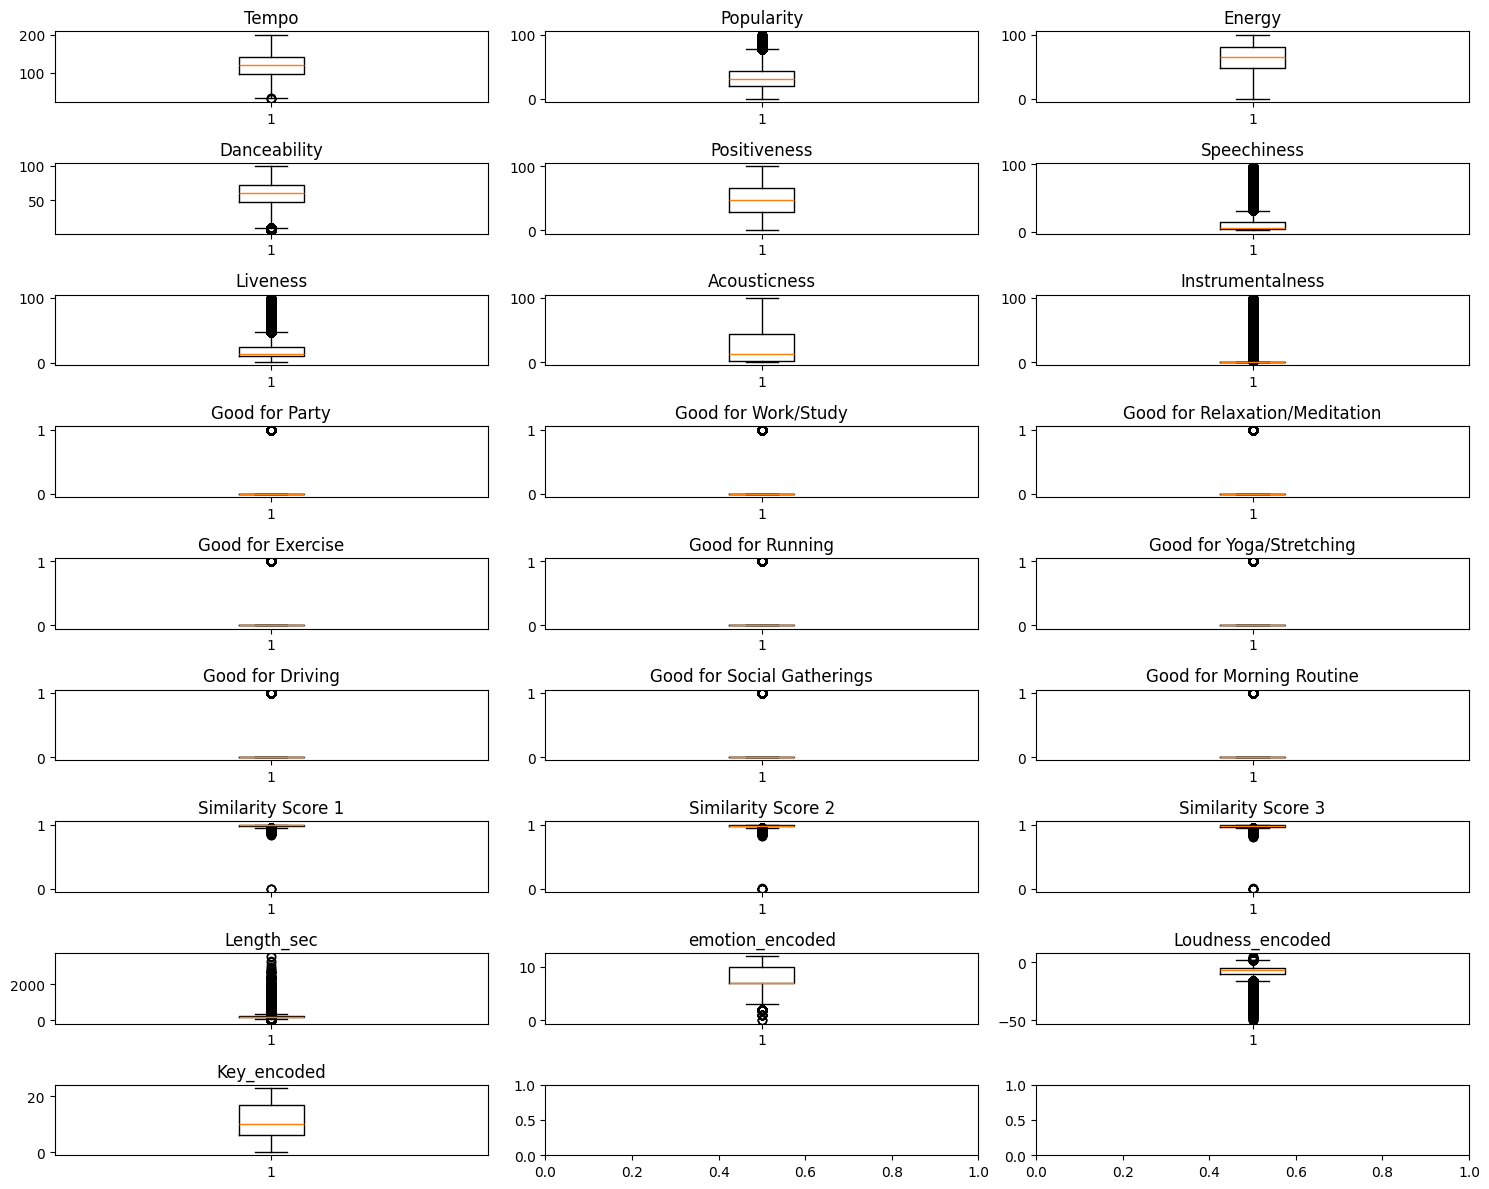

In [18]:
# All numerical features at once. Need to see how we can improve this and if we need all features.
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(len(numerical_cols)//3 + 1, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(col)
    
plt.tight_layout()
plt.show()

In [19]:
# checking null values across columns
null_values = df.isnull().sum()
null_values

Artist(s)                          0
song                              16
text                               0
Length                             0
emotion                            0
Genre                              0
Album                             52
Release Date                       0
Key                                0
Tempo                              0
Loudness (db)                      0
Time signature                     8
Explicit                           0
Popularity                         0
Energy                             0
Danceability                       0
Positiveness                       0
Speechiness                        0
Liveness                           0
Acousticness                       0
Instrumentalness                   0
Good for Party                     0
Good for Work/Study                0
Good for Relaxation/Meditation     0
Good for Exercise                  0
Good for Running                   0
Good for Yoga/Stretching           0
G

In [20]:
# Printing columns that have null values
columns_with_missing_values = null_values[null_values > 0].index
print(f"Columns with missing values: {columns_with_missing_values}")

Columns with missing values: Index(['song', 'Album', 'Time signature', 'Similar Song 1', 'Similar Song 2',
       'Similar Song 3'],
      dtype='object')


In [21]:
# A peak at the rows with missing values. 
missing_values_mask = df.isnull().any(axis=1)
rows_with_missing_values = df[missing_values_mask]
print("Rows with Missing Values:")
rows_with_missing_values

Rows with Missing Values:


,Artist(s),song,text,Length,emotion,Genre,Album,Release Date,Key,Tempo,...,Similar Artist 2,Similar Song 2,Similarity Score 2,Similar Artist 3,Similar Song 3,Similarity Score 3,Length_sec,emotion_encoded,Loudness_encoded,Key_encoded
5804,"90's Rolling Music,Kolohe",Rolling,[Intro:] [ad libs] [Jace talking] [Chorus:] I...,01:29,joy,hip hop,Level Up,1st June 2018,D Maj,75,...,JAZZY NANU,NaN,0.957782,J-Soul,Jane 2 Miami,0.957710,89,7,-18.42,10
31370,ARTMS,AROUND,"[히치하이커 & 태용 ""AROUND"" 가사] [Intro] Drop the bas...",03:31,joy,"pop,k-pop",NaN,31st May 2024,F# min,75,...,Skillet,Finish Line,0.968998,Jesse McCartney,Just So You Know,0.965420,211,7,-4.03,19
33348,"Atmosphere,Slug,Ant",Nothing But Sunshine,[Slug] (Mixed vocals) Whatta you mean what w...,11:38,sadness,hip hop,Lucy Ford: The Atmosphere EP's,1st February 2001,A# min,155,...,Tory Lanez,Happiness x Tell Me,0.940708,"Berner,Atmosphere,Mistah F.A.B.",Murals / Changes,0.926255,698,10,-7.81,3
52785,Bing Crosby,Changing Partners,We were waltzin' together to a dreamy melody ...,02:51,sadness,"pop,jazz",One Hundred Hits Of,21st June 2011,G Maj,64,...,Leo Sayer,Don't Say It's Over,0.990993,Sonya Hunter,Expecting To Fly,0.990742,171,10,-15.38,20
53920,Bktherula,Revolver,"[Intro] (What you say, gang?) BK (What you say...",01:45,fear,hip hop,Love Santana,11th January 2020,G# min,123,...,Headie One,Numbed Down,0.973802,"Chauie Made,Forestxfire",BREAK U OFF,0.973669,105,5,-5.40,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519858,VIC MENSA,Rage,"[Intro] Command, we've lost control The engine...",05:19,sadness,hip hop,The Autobiography,28th July 2017,C# Maj,150,...,"Fabolous,Abir Haronni",Young OG II,0.955105,"Joe Budden,Juicy J,Lloyd Banks",Last Day,0.953479,319,10,-5.82,8
525084,Vybz Kartel,Touch a Button,[Intro] Y-yo Shawn Storm... Before you corn de...,01:56,fear,"reggae,dancehall",Touch a Button,7th September 2010,E min,105,...,G Perico,Run,0.981933,"DJ Drewski,DreamDoll,Molly Brazy,Rubi Rose",Brazy,0.981139,116,5,-10.00,15
534160,WILLOW,IM NOT OKAY I PROMISE,"Well, if you wanted honesty that's all you had...",02:39,sadness,punk rock,NaN,7th October 2022,F# Maj,154,...,Bowling For Soup,I Ran So Far Away,0.987294,"Ocean Sleeper,LiL Lotus",Chemical,0.984954,159,10,-12.98,18
534163,WILLOW,Maybe,"Maybe Oh if I could pray and I try, dear ...",02:39,joy,punk rock,NaN,7th October 2022,F# Maj,154,...,Miranda Lambert,Heart Like Mine,0.983672,Bad Religion,New Dark Ages,0.978986,159,7,-12.98,18


In [22]:
# Check for duplicates based on artist and song name
duplicates = df[df.duplicated(subset=['Artist(s)', 'song',], keep=False)]

# View duplicates
print(f"Number of duplicate rows: {len(duplicates)}")
duplicates.sort_values(['Artist(s)', 'song'])

Number of duplicate rows: 68847


,Artist(s),song,text,Length,emotion,Genre,Album,Release Date,Key,Tempo,...,Similar Artist 2,Similar Song 2,Similarity Score 2,Similar Artist 3,Similar Song 3,Similarity Score 3,Length_sec,emotion_encoded,Loudness_encoded,Key_encoded
318,$NOT,Mean,[Intro: $NOT] Brr [Chorus: $NOT] I'm a real n...,02:00,anger,hip hop,- TRAGEDY +,6th March 2020,C Maj,80,...,$NOT,GOSHA,1.000000,Aflacko,Cake,0.958720,120,2,-10.14,6
319,$NOT,Mean,[Intro: $NOT] Brr [Chorus: $NOT] I'm a real n...,02:00,anger,hip hop,- TRAGEDY +,6th March 2020,C Maj,80,...,$NOT,GOSHA,1.000000,Aflacko,Cake,0.958720,120,2,-10.14,6
320,$NOT,Mean,[Intro: $NOT] Brr [Chorus: $NOT] I'm a real n...,02:00,anger,hip hop,- TRAGEDY +,6th March 2020,C Maj,80,...,$NOT,GOSHA,1.000000,Aflacko,Cake,0.958720,120,2,-10.14,6
355,"$NOT,Wifisfuneral",NASTY,"[Verse 1: Robb Bank$] Bitch, I'm a big body Wr...",02:40,anger,hip hop,- TRAGEDY +,6th March 2020,F# min,96,...,"$NOT,Wifisfuneral",Cant Feel My Face,1.000000,"$NOT,Wifisfuneral",Anything,1.000000,160,2,-7.94,19
356,"$NOT,Wifisfuneral",NASTY,"[Verse 1: Robb Bank$] Bitch, I'm a big body Wr...",02:40,anger,hip hop,- TRAGEDY +,6th March 2020,F# min,96,...,"$NOT,Wifisfuneral",Cant Feel My Face,1.000000,"$NOT,Wifisfuneral",Anything,1.000000,160,2,-7.94,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551420,"遠野高志,加島優,矢口恭介,ジミー,百合絢斗,田村唯,明美圭一,糸目幸士郎,鹿谷樹",Touch You Jimmy Ver.,"Ah, ah, ah, ah, ah I don't need simple words B...",03:26,sadness,hip hop,アニメ『ヤリチン☆ビッチ部』主題歌「Touch You」,15th August 2018,G# min,135,...,"遠野高志,加島優,矢口恭介,ジミー,百合絢斗,田村唯,明美圭一,糸目幸士郎,鹿谷樹",Touch You Itome Ver.,0.999896,Bruce Springsteen,I'm Goin' Down,0.992467,206,10,-2.89,23
551421,"遠野高志,加島優,矢口恭介,ジミー,百合絢斗,田村唯,明美圭一,糸目幸士郎,鹿谷樹",Touch You Jimmy Ver.,"Ah, ah, ah, ah, ah I don't need simple words B...",03:26,sadness,hip hop,アニメ『ヤリチン☆ビッチ部』主題歌「Touch You」,15th August 2018,G# min,135,...,"遠野高志,加島優,矢口恭介,ジミー,百合絢斗,田村唯,明美圭一,糸目幸士郎,鹿谷樹",Touch You Itome Ver.,0.999896,Bruce Springsteen,I'm Goin' Down,0.992467,206,10,-2.89,23
551422,"遠野高志,加島優,矢口恭介,ジミー,百合絢斗,田村唯,明美圭一,糸目幸士郎,鹿谷樹",Touch You Jimmy Ver.,"Ah, ah, ah, ah, ah I don't need simple words B...",03:26,sadness,hip hop,アニメ『ヤリチン☆ビッチ部』主題歌「Touch You」,15th August 2018,G# min,135,...,"遠野高志,加島優,矢口恭介,ジミー,百合絢斗,田村唯,明美圭一,糸目幸士郎,鹿谷樹",Touch You Itome Ver.,0.999896,Bruce Springsteen,I'm Goin' Down,0.992467,206,10,-2.89,23
551423,"遠野高志,加島優,矢口恭介,ジミー,百合絢斗,田村唯,明美圭一,糸目幸士郎,鹿谷樹",Touch You Jimmy Ver.,"Ah, ah, ah, ah, ah I don't need simple words B...",03:26,sadness,hip hop,アニメ『ヤリチン☆ビッチ部』主題歌「Touch You」,15th August 2018,G# min,135,...,"遠野高志,加島優,矢口恭介,ジミー,百合絢斗,田村唯,明美圭一,糸目幸士郎,鹿谷樹",Touch You Itome Ver.,0.999896,Bruce Springsteen,I'm Goin' Down,0.992467,206,10,-2.89,23


In [23]:
# We will drop the duplicate values
print(df.duplicated().sum())
df = df.drop_duplicates()

53391


In [24]:
# Initially we thought dropping them would be better, However, we could just fill it with a dummy value since it isnt a lot of missing rows and could thus use the whole dataset to train.
df['song'] = df['song'].fillna('Unknown')

In [25]:
# To fill rows with missing time signature we will use the Genre column
grouped = df.groupby(['Genre', 'Time signature']).size().reset_index(name='Count')
print(grouped)

                       Genre Time signature  Count
0                   acoustic            1/4      1
1                   acoustic            3/4      7
2                   acoustic            4/4     33
3                   acoustic            5/4      1
4           acoustic,country            4/4      2
...                      ...            ...    ...
6210  worship,christian,rock            4/4    212
6211          worship,gospel            3/4      6
6212          worship,gospel            4/4     24
6213          worship,gospel            5/4      1
6214     worship,hip-hop,rap            3/4      1

[6215 rows x 3 columns]


In [26]:
# The idea is use to find in the rows with missing time signature see what genre they map to and get a count of what time signatures those genres have and use the mode.
missing_time = df[df['Time signature'].isnull()]

print("Rows with Missing Time Signature:")
missing_time

Rows with Missing Time Signature:


,Artist(s),song,text,Length,emotion,Genre,Album,Release Date,Key,Tempo,...,Similar Artist 2,Similar Song 2,Similarity Score 2,Similar Artist 3,Similar Song 3,Similarity Score 3,Length_sec,emotion_encoded,Loudness_encoded,Key_encoded
33348,"Atmosphere,Slug,Ant",Nothing But Sunshine,[Slug] (Mixed vocals) Whatta you mean what w...,11:38,sadness,hip hop,Lucy Ford: The Atmosphere EP's,1st February 2001,A# min,155,...,Tory Lanez,Happiness x Tell Me,0.940708,"Berner,Atmosphere,Mistah F.A.B.",Murals / Changes,0.926255,698,10,-7.81,3
78007,Carnivore,Sex And Violence,"Monkey wrench in my hand In my groin, a swolle...",03:49,sadness,"metal,thrash metal",Retaliation,5th August 1987,B Maj,155,...,Lorna Shore,Infernum,0.983968,Thy Art Is Murder,Furnace of Hate,0.982439,229,10,-5.01,4
203212,Houses,Smoke Signals,The birds Are struggling to prepare For this w...,04:30,sadness,hip hop,A Quiet Darkness,1st January 2013,F# Maj,100,...,alt-J,House of the Rising Sun,0.980146,Rusty Clanton,False Start,0.975489,270,10,-19.42,18
230510,JJ Heller,Keep You Safe,Quiet your heart It's just a dream Go back to ...,03:40,sadness,hip hop,Keep You Safe,16th April 2021,G Maj,59,...,Alan Menken,Days in the Sun - Demo,0.988837,Hilary Weeks,He Hears Me,0.988591,220,10,-14.16,20
247975,Kalin and Myles,Nobody but you,Nobody but you Got me feelin some type of way ...,03:02,joy,"pop,hip hop",Chase Dreams,17th June 2014,B Maj,121,...,"Tayla Parx,AFROJACK,Jewelz & Sparks",One More Day,0.961797,"Memphis Depay,Zah Santori",Body Like You,0.959711,182,7,-5.02,4
395414,Rio Romeo,Gay Jokes,My head feels a little bit dull today I stayed...,02:26,sadness,reggae,Obnoxious Liberal: The Musical,25th November 2018,A min,104,...,Eric Reprid,Nobody Knows,0.974296,Dxvn.,Tonight,0.973270,146,10,-8.77,1
419662,"Shawnna,Smoke",Damn,[Intro] Ohhhhhhhhh! That's right Your girl Sha...,04:19,joy,hip hop,Block Music,1st January 2006,C Maj,110,...,Mr. Lif,Earthcrusher,0.974983,Stalley,Jean Jacket,0.974274,259,7,-4.88,6
480484,The National Parks,Beautiful Night,Through all the strong winds What a beautiful ...,03:51,joy,hip hop,Places,15th September 2017,F# Maj,152,...,Westlife,Talk Me Down,0.990549,The Beautiful South,The River,0.987104,231,7,-9.00,18


In [27]:
# Genre count for hip hop
genre_data = grouped[grouped['Genre'] == 'hip hop']
print(genre_data)

        Genre Time signature   Count
2279  hip hop            1/4    1442
2280  hip hop            3/4   12498
2281  hip hop            4/4  191430
2282  hip hop            5/4    4729


In [28]:
# Genre count for reggae
genre_data = grouped[grouped['Genre'] == 'reggae']
print(genre_data)

       Genre Time signature  Count
4786  reggae            1/4      7
4787  reggae            3/4     41
4788  reggae            4/4   2498
4789  reggae            5/4     67


In [29]:
# Genre count for pop,hip hop
genre_data = grouped[grouped['Genre'] == 'pop,hip hop']
print(genre_data)

            Genre Time signature  Count
3919  pop,hip hop            1/4      1
3920  pop,hip hop            3/4      7
3921  pop,hip hop            4/4    175
3922  pop,hip hop            5/4      2


In [30]:
# Genre count for metal,thrash metal
genre_data = grouped[grouped['Genre'] == 'metal,thrash metal']
print(genre_data)

                   Genre Time signature  Count
3386  metal,thrash metal            3/4      6
3387  metal,thrash metal            4/4     94


In [31]:
# we can tell from the above that there is a clear majority in each of the genres, hence we will impute the time signature with using mode.
df['Time signature'] = df.groupby('Genre')['Time signature'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 4)
)

In [32]:
# We have 3 columns with empty values - Album, Similar Song 1, Similar Song 2, and Similar Song 3.
# Although I am tempted to drop them I need to see if there is a solid reasoning to back me up.
# I could fill the Album column with a random value such as "Unkown".

df['Album'] = df['Album'].fillna('Unknown')

In [33]:
"""
Now we have to deal with Similar Song 1, 2, and 3.
Again since those values are empty and it would be difficult to try to determine the song name from the artist name (finding the artist
nam from the song name would have been easier if it was an error during extraction), we could fill it with a dummy value such as "unkown"
"""
df['Similar Song 1'] = df['Similar Song 1'].fillna('Unknown')
df['Similar Song 2'] = df['Similar Song 2'].fillna('Unknown')
df['Similar Song 3'] = df['Similar Song 3'].fillna('Unknown')

In [34]:
# Getting an updated null count
null_values = df.isnull().sum()
null_values

Artist(s)                         0
song                              0
text                              0
Length                            0
emotion                           0
Genre                             0
Album                             0
Release Date                      0
Key                               0
Tempo                             0
Loudness (db)                     0
Time signature                    0
Explicit                          0
Popularity                        0
Energy                            0
Danceability                      0
Positiveness                      0
Speechiness                       0
Liveness                          0
Acousticness                      0
Instrumentalness                  0
Good for Party                    0
Good for Work/Study               0
Good for Relaxation/Meditation    0
Good for Exercise                 0
Good for Running                  0
Good for Yoga/Stretching          0
Good for Driving            

In [35]:
# Distribution of Popularity
print(df.groupby('Time signature').size())

Time signature
1/4      3378
3/4     34609
4/4    451519
5/4      8546
dtype: int64


In [36]:
"""
The Time Signature in out dataset is an object, which makes sense since its in the form 1/4, 2/4, etc.
However, our dataset only contains time signatures with denominator 4 (no /2 or /8).
Thus we will change it to just contain the numerator by converting to a string, getting rid of everything from '/' and then convert it to
a number and assign it to a new column called "Time_signature_numeric".
"""
df['Time_signature_str'] = df['Time signature'].astype(str)

df['Time_signature_numeric'] = df['Time_signature_str'].str.split('/').str[0]

df['Time_signature_numeric'] = pd.to_numeric(df['Time_signature_numeric'], errors='coerce')


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498052 entries, 0 to 551442
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Artist(s)                       498052 non-null  object 
 1   song                            498052 non-null  object 
 2   text                            498052 non-null  object 
 3   Length                          498052 non-null  object 
 4   emotion                         498052 non-null  object 
 5   Genre                           498052 non-null  object 
 6   Album                           498052 non-null  object 
 7   Release Date                    498052 non-null  object 
 8   Key                             498052 non-null  object 
 9   Tempo                           498052 non-null  int64  
 10  Loudness (db)                   498052 non-null  object 
 11  Time signature                  498052 non-null  object 
 12  Explicit             

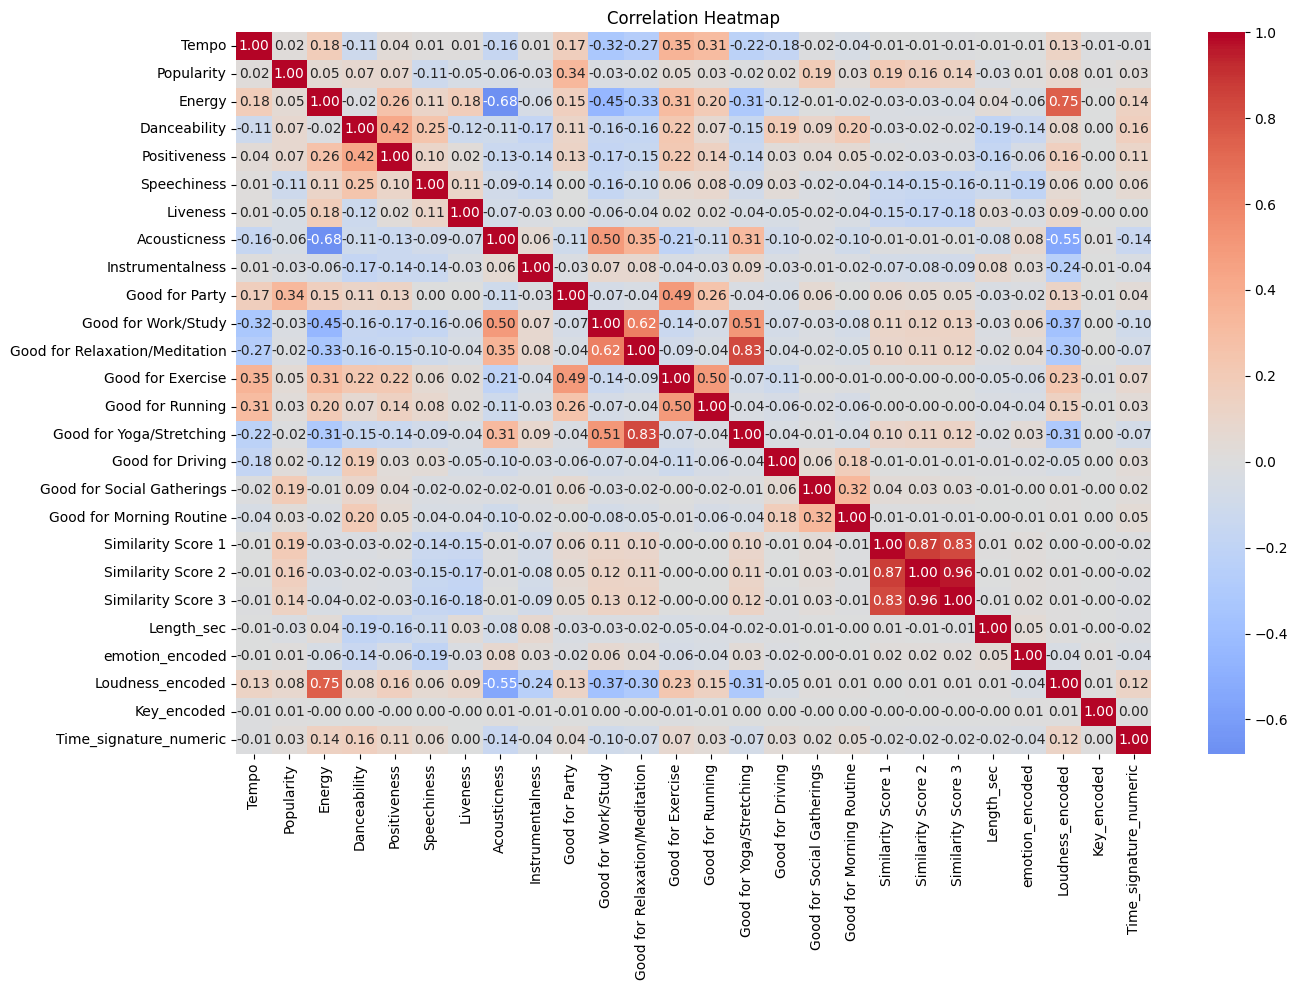

In [38]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(14, 10))
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [39]:
print(df.groupby('Genre').size())

Genre
acoustic                        42
acoustic,country                 2
acoustic,folk                    8
acoustic,folk,ambient            2
acoustic,indie,experimental      1
                              ... 
worship                        101
worship,christian               10
worship,christian,rock         228
worship,gospel                  31
worship,hip-hop,rap              1
Length: 3097, dtype: int64


In [40]:
df['Genre'].nunique()

3097

In [41]:
"""
Get all unique individual genres - one hot embedding.
Initially, we did try Label encoding, however we quickly realised that the genre's weren't always classified as pop or hip hop.
Often times, the genre column had a combination of genres such as "pop, hip hop", "metal, thrash metal" thus, we thought
one hot embedding would be the better option.
"""
all_genres = set()
for genres in df['Genre']:
    all_genres.update(g.strip() for g in genres.split(','))

# Create all genre columns at once (faster)
genre_columns = {}
for genre in sorted(all_genres):
    # Use word boundaries or exact match after splitting
    genre_columns[f'genre_{genre}'] = df['Genre'].apply(
        lambda x: int(genre in [g.strip() for g in x.split(',')])
    )

# Add all columns at once
genre_df = pd.DataFrame(genre_columns)
df = pd.concat([df, genre_df], axis=1)

# Verify
print(f"Created {len(all_genres)} genre columns")

Created 88 genre columns


In [42]:
# Select only genre columns and Popularity
genre_cols = [col for col in df.columns if col.startswith('genre_')]
genre_pop_df = df[genre_cols + ['Popularity']]

# Calculate correlations with Popularity
correlations = genre_pop_df.corr()['Popularity'].drop('Popularity').sort_values(ascending=False)

# Display top correlations
print("Top positive correlations:")
print(correlations.head(10))
print("\nTop negative correlations:")
print(correlations.tail(10))


Top positive correlations:
genre_pop                 0.149549
genre_trap                0.114099
genre_rap                 0.091254
genre_rock                0.085467
genre_alternative rock    0.082639
genre_k-pop               0.081330
genre_electropop          0.080770
genre_reggae              0.056892
genre_heavy metal         0.055721
genre_pop rock            0.052535
Name: Popularity, dtype: float64

Top negative correlations:
genre_soundtrack     -0.010142
genre_hardcore       -0.010241
genre_folk           -0.010347
genre_garage rock    -0.011749
genre_indie rock     -0.011762
genre_doom metal     -0.011780
genre_experimental   -0.015397
genre_dream pop      -0.015398
genre_post-punk      -0.020163
genre_hip hop        -0.153475
Name: Popularity, dtype: float64


In [43]:
# Drop columns not useful for prediction
columns_to_drop = ['Artist(s)', 'song', 'text', 'Length', 'emotion', 'Genre', 
                   'Album', 'Release Date', 'Similar Artist 1', 'Similar Song 1', 
                   'Similar Artist 2', 'Similar Song 2', 'Similar Artist 3', 
                   'Similar Song 3','Similarity Score 1','Similarity Score 2','Similarity Score 3', 'Genre_encoded', 'Loudness (db)', 
                   'Time_signature_str', 'Key','Time signature', 'Explicit']

df_model = df.drop(columns=columns_to_drop, errors='ignore')


In [44]:
# Separate features and target
X = df_model.drop(columns=['Popularity'])
y = df_model['Popularity']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (498052, 110)
Target: (498052,)


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (398441, 110), Test: (99611, 110)


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Convert scaled data back to DataFrame so we can use column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

baseline = DummyRegressor(strategy='mean')
baseline.fit(X_train_scaled, y_train)
y_pred_baseline = baseline.predict(X_test_scaled)

print("Baseline (Mean Prediction):")
print(f"MAE: {mean_absolute_error(y_test, y_pred_baseline):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_baseline)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_baseline):.4f}")

Baseline (Mean Prediction):
MAE: 13.48
RMSE: 17.17
R²: -0.0001


In [48]:
# 1. Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_lr):.4f}")

Linear Regression:
MAE: 11.72
RMSE: 14.95
R²: 0.2425


In [49]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_rf):.4f}")

Random Forest:
MAE: 9.38
RMSE: 12.29
R²: 0.4874


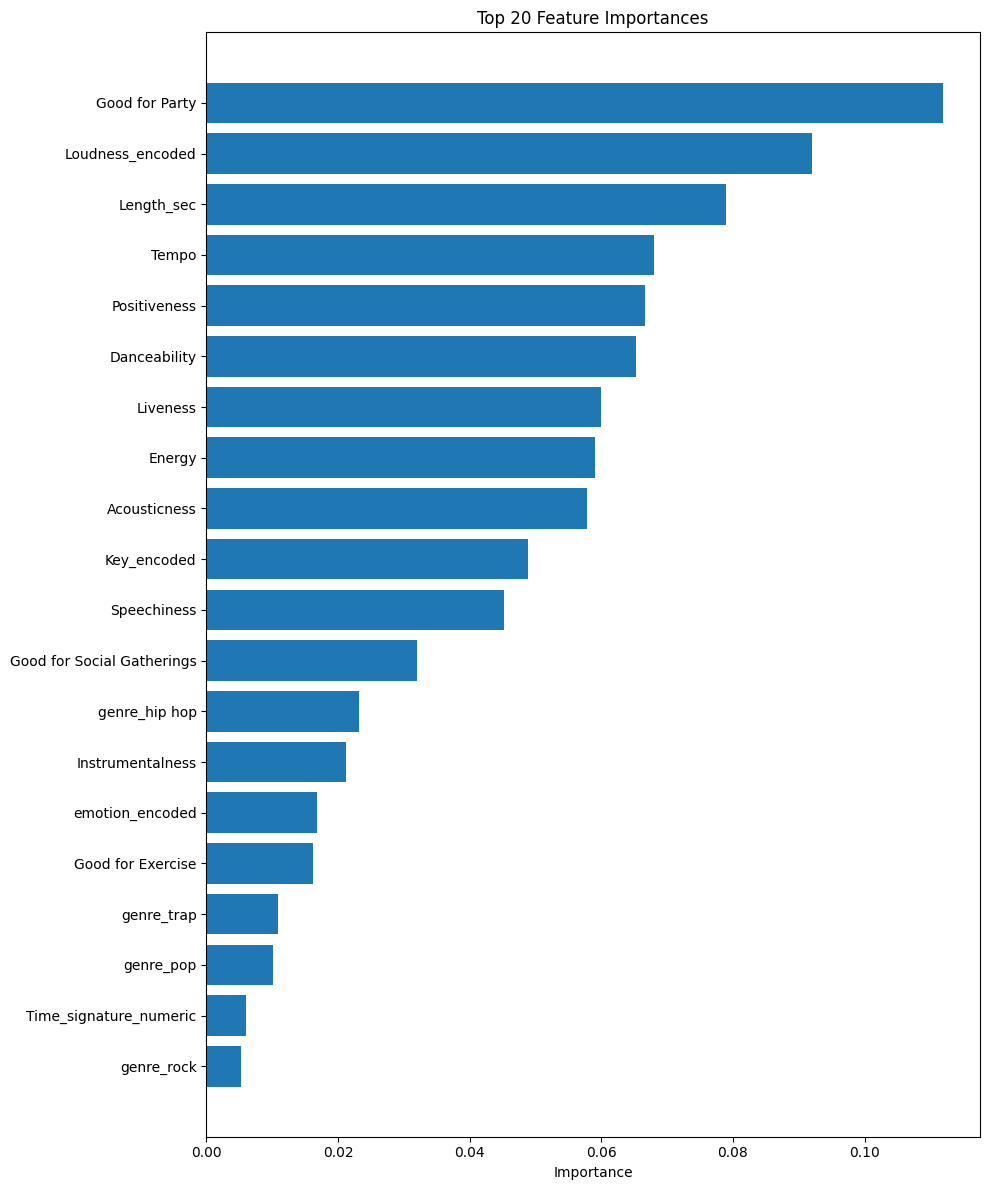

                        feature  importance
8                Good for Party    0.111954
19             Loudness_encoded    0.092096
17                   Length_sec    0.078964
0                         Tempo    0.068042
3                  Positiveness    0.066601
2                  Danceability    0.065287
5                      Liveness    0.059914
1                        Energy    0.059093
6                  Acousticness    0.057797
20                  Key_encoded    0.048849
4                   Speechiness    0.045259
15   Good for Social Gatherings    0.032013
63                genre_hip hop    0.023235
7              Instrumentalness    0.021160
18              emotion_encoded    0.016807
11            Good for Exercise    0.016148
107                  genre_trap    0.010797
81                    genre_pop    0.010089
21       Time_signature_numeric    0.005950
97                   genre_rock    0.005283


In [73]:
importances = rf.feature_importances_
feature_names = X_train_scaled.columns
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 12))
plt.barh(feature_importance_df['feature'][:20], feature_importance_df['importance'][:20])
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(feature_importance_df.head(20))

In [51]:
# Select top N features
top_n = 100
top_features = feature_importance_df['feature'][:top_n].values

print(f"\nSelected top {top_n} features:")
print(top_features)

# Create new datasets with only top features
X_train_selected = X_train_scaled[top_features]
X_test_selected = X_test_scaled[top_features]

print(f"\nNew shapes:")
print(f"X_train_selected: {X_train_selected.shape}")
print(f"X_test_selected: {X_test_selected.shape}")

# Retrain model on selected features
from sklearn.ensemble import RandomForestRegressor
rf_selected = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_selected.fit(X_train_selected, y_train)
y_pred_selected = rf_selected.predict(X_test_selected)


print("Random Forest:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_selected):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_selected)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_selected):.4f}")


Selected top 100 features:
['Good for Party' 'Loudness_encoded' 'Length_sec' 'Tempo' 'Positiveness'
 'Danceability' 'Liveness' 'Energy' 'Acousticness' 'Key_encoded'
 'Speechiness' 'Good for Social Gatherings' 'genre_hip hop'
 'Instrumentalness' 'emotion_encoded' 'Good for Exercise' 'genre_trap'
 'genre_pop' 'Time_signature_numeric' 'genre_rock'
 'genre_alternative rock' 'genre_rap' 'genre_country' 'genre_pop rock'
 'genre_electronic' 'genre_soul' 'genre_k-pop' 'genre_heavy metal'
 'genre_reggae' 'genre_electropop' 'Good for Morning Routine' 'genre_folk'
 'Good for Driving' 'genre_hip-hop' 'genre_jazz' 'genre_indie pop'
 'genre_synthpop' 'genre_indie rock' 'genre_metal' 'genre_blues'
 'genre_hard rock' 'genre_new wave' 'genre_progressive rock'
 'genre_classic rock' 'genre_alternative' 'Good for Work/Study'
 'genre_dance' 'genre_psychedelic rock' 'genre_classical'
 'genre_dancehall' 'genre_swing' 'genre_rnb' 'genre_emo rap' 'genre_indie'
 'genre_cloud rap' 'genre_gospel' 'genre_punk' 'g

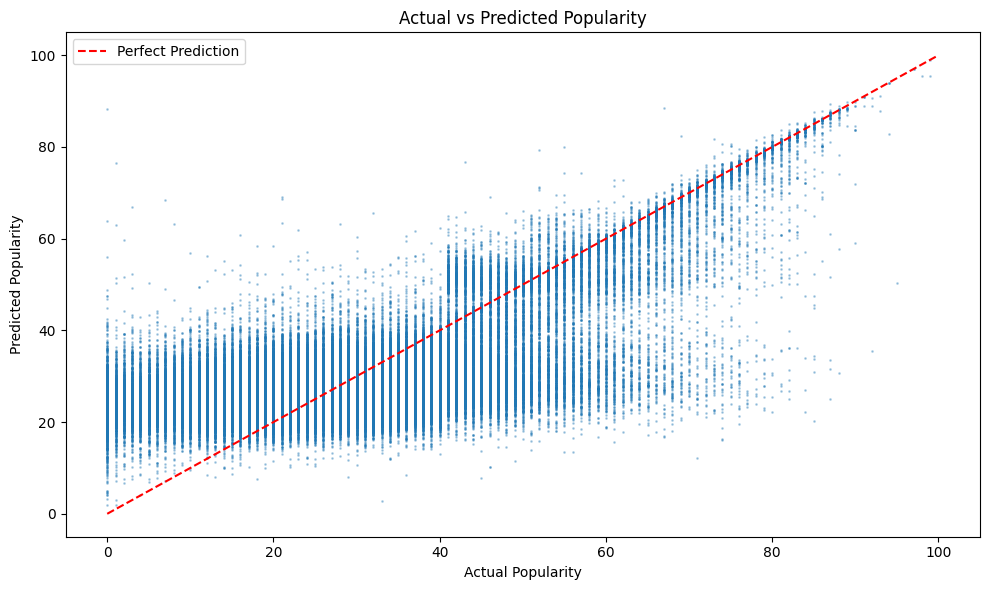

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_selected, alpha=0.3, s=1)
plt.plot([0, 100], [0, 100], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity')
plt.legend()
plt.tight_layout()
plt.show()


Error Analysis by Popularity Range:
                         mean  count
popularity_range                    
Very Low (0-20)     12.876578  28155
Low (20-40)          5.616789  45524
Medium (40-60)      11.878780  17848
High (60-80)        10.382588   5628
Very High (80-100)   5.418439    703


/var/folders/2r/_87qv9sj4vgd230ytthgc5sr0000gn/T/ipykernel_49855/4011786222.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_errors = errors_df.groupby('popularity_range')['error'].agg(['mean', 'count'])


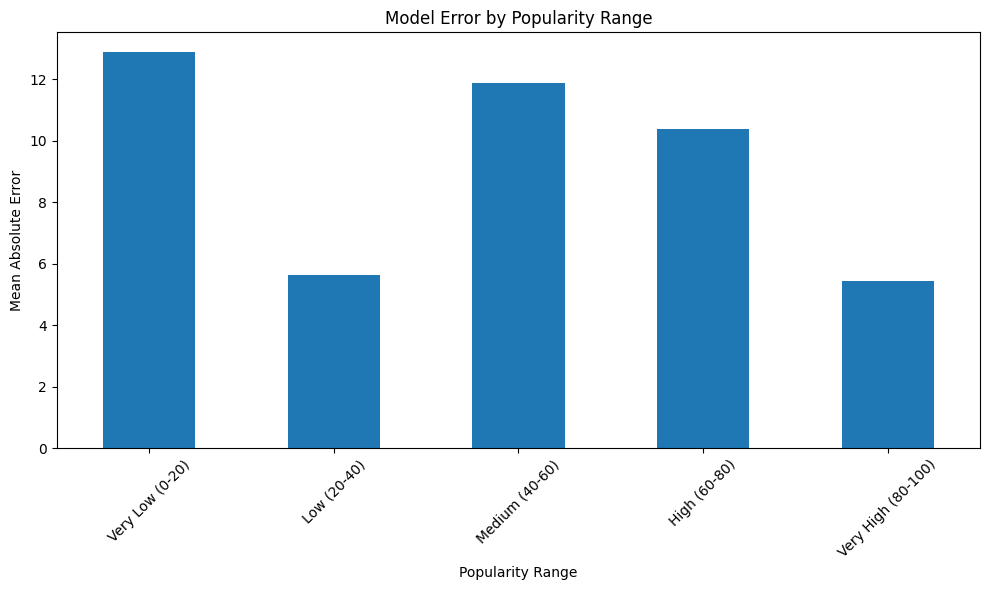

In [54]:
# Error by Popularity Range
y_pred_final=y_pred_selected
errors_df = pd.DataFrame({
'actual': y_test.values,
'predicted': y_pred_final,
'error': abs(y_test.values - y_pred_final)
}).sort_values('error', ascending=False)

errors_df['popularity_range'] = pd.cut(
    errors_df['actual'], 
    bins=[0, 20, 40, 60, 80, 100],
    labels=['Very Low (0-20)', 'Low (20-40)', 'Medium (40-60)', 'High (60-80)', 'Very High (80-100)']
)

print("\nError Analysis by Popularity Range:")
range_errors = errors_df.groupby('popularity_range')['error'].agg(['mean', 'count'])
print(range_errors)

# Visualize
plt.figure(figsize=(10, 6))
range_errors['mean'].plot(kind='bar')
plt.xlabel('Popularity Range')
plt.ylabel('Mean Absolute Error')
plt.title('Model Error by Popularity Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Collect predictions from all models
models = {
    'Baseline (Mean)': y_pred_baseline,
    'Linear Regression': y_pred_lr,
    'Random Forest': y_pred_selected
}

results = []
for name, y_pred in models.items():
    results.append({
        'Model': name,
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R²': r2_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print(results_df)

               Model        MAE       RMSE        R²
0    Baseline (Mean)  13.475892  17.171747 -0.000052
1  Linear Regression  11.716205  14.945373  0.242457
2      Random Forest   9.381904  12.296499  0.487190


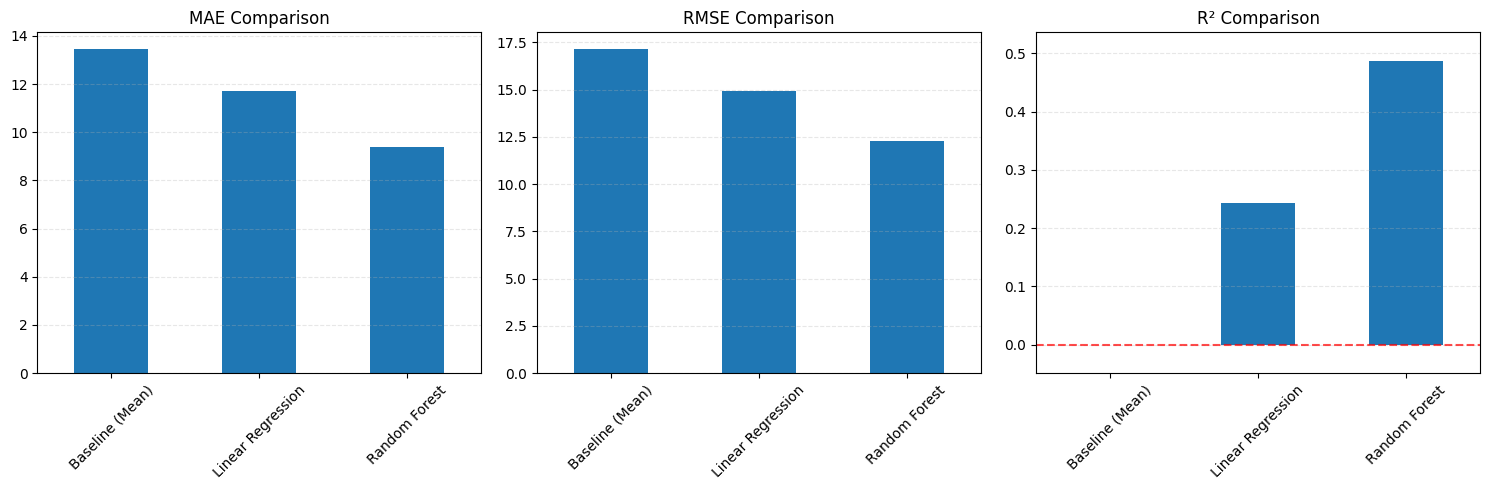

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics = ['MAE', 'RMSE', 'R²']

for idx, metric in enumerate(metrics):
    results_df.plot(x='Model', y=metric, kind='bar', ax=axes[idx], legend=False)
    axes[idx].set_title(f'{metric} Comparison')
    axes[idx].set_xlabel('')
    axes[idx].tick_params(axis='x', rotation=45)
    
    if metric == 'R²':
        # Allow y-axis to show negative values
        y_min = results_df[metric].min()
        y_max = results_df[metric].max()
        
        # Add some padding
        padding = (y_max - y_min) * 0.1 if y_max > y_min else 0.1
        axes[idx].set_ylim([y_min - padding, y_max + padding])
        
        # Add zero line for reference
        axes[idx].axhline(y=0, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
    else:
        # MAE and RMSE start at 0
        axes[idx].set_ylim(bottom=0)
    
    axes[idx].grid(axis='y', alpha=0.3, linestyle='--')
    
plt.tight_layout()
plt.show()

In [68]:
X_energy = df_model.drop(columns=['Energy'])
y_energy = df_model['Energy'] 

X_energy_train, X_energy_test, y_energy_train, y_energy_test = train_test_split(X_energy, y_energy, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_energy_train_scaled = scaler.fit_transform(X_energy_train)
X_energy_test_scaled = scaler.transform(X_energy_test)

# Convert scaled data back to DataFrame so we can use column names
X_energy_train_scaled = pd.DataFrame(X_energy_train_scaled, columns=X_energy_train.columns)
X_energy_test_scaled  = pd.DataFrame(X_energy_test_scaled, columns=X_energy_test.columns)


In [70]:
from sklearn.ensemble import RandomForestRegressor

rf_energy = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_energy.fit(X_energy_train_scaled, y_energy_train)
y_pred_energy = rf_energy.predict(X_energy_test_scaled)

print("Random Forest:")
print(f"MAE: {mean_absolute_error(y_energy_test, y_pred_energy):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_energy_test, y_pred_energy)):.2f}")
print(f"R²: {r2_score(y_energy_test, y_pred_energy):.4f}")

Random Forest:
MAE: 5.38
RMSE: 7.68
R²: 0.8858


In [72]:
print("True Energy values vs. Predicted Energy values (first 10):")
for i in range(10):
    print(f"True: {y_energy_test.iloc[i]:.4f}, Predicted: {y_pred_energy[i]:.4f}")


True Energy values vs. Predicted Energy values (first 10):
True: 88.0000, Predicted: 91.2300
True: 44.0000, Predicted: 51.5000
True: 86.0000, Predicted: 63.5700
True: 57.0000, Predicted: 71.4200
True: 41.0000, Predicted: 36.9900
True: 32.0000, Predicted: 37.9300
True: 96.0000, Predicted: 91.4400
True: 32.0000, Predicted: 30.2400
True: 69.0000, Predicted: 65.5200
True: 73.0000, Predicted: 71.6500
